In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
seg_df=pd.read_csv('../dataset/dataseg.csv')

In [3]:
seg_df.drop(seg_df.columns[[0,1]], axis=1, inplace=True)

In [4]:
seg_df.shape

(2864, 19)

In [5]:
seg_df.head(20)

gender  SeniorCitizen Partner  Dependents  tenure PhoneService  \
0     Male            1.0      No         0.0     1.0          Yes   
1     Male            0.0      No         0.0     5.0          Yes   
2     Male            0.0      No         0.0    34.0          Yes   
3   Female            0.0      No         0.0    11.0          Yes   
4   Female            0.0     Yes         0.0    13.0          Yes   
5   Female            0.0      No         0.0    49.0          Yes   
6     Male            0.0      No         0.0     2.0          Yes   
7   Female            0.0      No         0.0     2.0          Yes   
8   Female            1.0      No         0.0    43.0          Yes   
9   Female            0.0      No         0.0    15.0          Yes   
10  Female            1.0     Yes         0.0     8.0          Yes   
11    Male            1.0      No         0.0    18.0          Yes   
12  Female            0.0     Yes         0.0    47.0          Yes   
13    Male            0.0      No         0.0    60.0          Yes   
14  Female            0.0      No         0.0     9.0          Yes   
15  Female            0.0      No         0.0     3.0          Yes   
16    Male            0.0      No         0.0    10.0          Yes   
17    Male            0.0      No         0.0     1.0          Yes   
18    Male            1.0      No         0.0    30.0          Yes   
19  Female            0.0      No         1.0     1.0          Yes   

   MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection  \
0             No             DSL             No           No               No   
1             No     Fiber optic             No           No               No   
2            Yes     Fiber optic             No          Yes              Yes   
3            Yes     Fiber optic             No           No              Yes   
4            Yes             DSL            Yes          Yes               No   
5            Yes     Fiber optic             No           No               No   
6             No             DSL             No          Yes               No   
7             No     Fiber optic             No           No               No   
8            Yes     Fiber optic             No          Yes               No   
9             No     Fiber optic            Yes          Yes               No   
10           Yes     Fiber optic             No          Yes               No   
11           Yes     Fiber optic             No           No               No   
12           Yes     Fiber optic             No           No              Yes   
13           Yes     Fiber optic             No          Yes               No   
14           Yes     Fiber optic             No           No               No   
15            No             DSL             No          Yes               No   
16            No     Fiber optic            Yes           No              Yes   
17            No             DSL             No           No               No   
18            No             DSL            Yes          Yes               No   
19            No     Fiber optic             No           No               No   

   TechSupport StreamingTV StreamingMovies        Contract  PaperlessBilling  \
0           No          No              No  Month-to-month               0.0   
1           No          No              No  Month-to-month               1.0   
2           No         Yes             Yes  Month-to-month               1.0   
3           No         Yes             Yes  Month-to-month               1.0   
4          Yes         Yes              No  Month-to-month               1.0   
5           No          No             Yes  Month-to-month               1.0   
6           No          No              No  Month-to-month               0.0   
7           No         Yes              No  Month-to-month               1.0   
8           No         Yes              No  Month-to-month               1.0   
9           No         Yes     

In [6]:
partner_map={'Yes': 1,'No':0}
multlines_map={'Yes': 1,'No':0,'No phone service':2}
interser_map={'Fiber optic': 1,'No':0,'DSL':2}
onlsec_map={'Yes': 1,'No':0,'No internet service':2}
onlback_map={'Yes': 1,'No':0,'No internet service':2}
devpro_map={'Yes': 1,'No':0,'No internet service':2}
techsup_map={'Yes': 1,'No':0,'No internet service':2}
contract_map={'Month-to-month': 1,'One year':0,'Two year':2}
paymethod_map={'Electronic check': 1,'Mailed check':0,'Bank transfer (automatic)':2,'Credit card (automatic)':3}


seg_df['Partner'] = seg_df['Partner'].map(partner_map)
seg_df['MultipleLines'] = seg_df['MultipleLines'].map(multlines_map)
seg_df['InternetService'] = seg_df['InternetService'].map(interser_map)
seg_df['OnlineSecurity'] = seg_df['OnlineSecurity'].map(onlsec_map)
seg_df['OnlineBackup'] = seg_df['OnlineBackup'].map(onlback_map)
seg_df['DeviceProtection'] = seg_df['DeviceProtection'].map(devpro_map)
seg_df['TechSupport'] = seg_df['TechSupport'].map(techsup_map)
seg_df['Contract'] = seg_df['Contract'].map(contract_map)
seg_df['PaymentMethod'] = seg_df['PaymentMethod'].map(paymethod_map)



In [7]:
numeric_var_names=[key for key in dict(seg_df.dtypes) if dict(seg_df.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(seg_df.dtypes) if dict(seg_df.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
['gender', 'PhoneService', 'StreamingTV', 'StreamingMovies']


In [8]:
telco_num=seg_df[numeric_var_names]

In [9]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

telco_num=telco_num.apply(lambda x: Missing_imputation(x))

In [10]:
from matplotlib.backends.backend_pdf import PdfPages

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [12]:
from sklearn.decomposition import PCA

In [13]:
telco_num.head()

SeniorCitizen  Partner  Dependents  tenure  MultipleLines  InternetService  \
0            1.0      0.0         0.0     1.0            0.0              2.0   
1            0.0      0.0         0.0     5.0            0.0              1.0   
2            0.0      0.0         0.0    34.0            1.0              1.0   
3            0.0      0.0         0.0    11.0            1.0              1.0   
4            0.0      1.0         0.0    13.0            1.0              2.0   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  Contract  \
0             0.0           0.0               0.0          0.0       1.0   
1             0.0           0.0               0.0          0.0       1.0   
2             0.0           1.0               1.0          0.0       1.0   
3             0.0           0.0               1.0          0.0       1.0   
4             1.0           1.0               0.0          1.0       1.0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0               0.0            2.0           45.25         45.25  
1               1.0            1.0           69.70        316.90  
2               1.0            1.0          106.35       3549.25  
3               1.0            2.0           97.85       1105.40  
4               1.0            1.0           76.20        981.45

In [14]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=telco_num.apply(lambda x: var_summary(x)).T

In [15]:
num_summary

N  NMISS         SUM         MEAN    MEDIAN  \
SeniorCitizen     2864.0    0.0      463.00     0.161662     0.000   
Partner           2864.0    0.0     1331.00     0.464735     0.000   
Dependents        2864.0    0.0      821.00     0.286662     0.000   
tenure            2864.0    0.0    88125.00    30.769902    25.000   
MultipleLines     2864.0    0.0     1742.00     0.608240     1.000   
InternetService   2864.0    0.0     3202.00     1.118017     1.000   
OnlineSecurity    2864.0    0.0     2019.00     0.704958     0.000   
OnlineBackup      2864.0    0.0     2192.00     0.765363     1.000   
DeviceProtection  2864.0    0.0     2170.00     0.757682     1.000   
TechSupport       2864.0    0.0     2007.00     0.700768     0.000   
Contract          2864.0    0.0     2929.00     1.022696     1.000   
PaperlessBilling  2864.0    0.0     1671.00     0.583450     1.000   
PaymentMethod     2864.0    0.0     4007.00     1.399092     1.000   
MonthlyCharges    2864.0    0.0   184790.75    64.521910    70.250   
TotalCharges      2864.0    0.0  6155586.45  2149.296945  1290.025   

                          STD           VAR    MIN       P1     P5    P10  \
SeniorCitizen        0.368205  1.355747e-01   0.00   0.0000   0.00   0.00   
Partner              0.498842  2.488432e-01   0.00   0.0000   0.00   0.00   
Dependents           0.452281  2.045583e-01   0.00   0.0000   0.00   0.00   
tenure              24.356140  5.932216e+02   1.00   1.0000   1.00   2.00   
MultipleLines        0.655039  4.290763e-01   0.00   0.0000   0.00   0.00   
InternetService      0.732011  5.358401e-01   0.00   0.0000   0.00   0.00   
OnlineSecurity       0.799862  6.397798e-01   0.00   0.0000   0.00   0.00   
OnlineBackup         0.781895  6.113601e-01   0.00   0.0000   0.00   0.00   
DeviceProtection     0.784461  6.153793e-01   0.00   0.0000   0.00   0.00   
TechSupport          0.800925  6.414804e-01   0.00   0.0000   0.00   0.00   
Contract             0.644579  4.154819e-01   0.00   0.0000   0.00   0.00   
PaperlessBilling     0.493073  2.431210e-01   0.00   0.0000   0.00   0.00   
PaymentMethod        1.058016  1.119398e+00   0.00   0.0000   0.00   0.00   
MonthlyCharges      29.828846  8.897601e+02  18.25  19.1500  19.65  20.05   
TotalCharges      2211.339814  4.890024e+06  18.85  19.8815  45.30  79.41   

                       P25       P50        P75      P90        P95  \
SeniorCitizen       0.0000     0.000     0.0000     1.00     1.0000   
Partner             0.0000     0.000     1.0000     1.00     1.0000   
Dependents          0.0000     0.000     1.0000     1.00     1.0000   
tenure              8.0000    25.000    53.0000    68.00    71.0000   
MultipleLines       0.0000     1.000     1.0000     1.00     2.0000   
InternetService     1.0000     1.000     2.0000     2.00     2.0000   
OnlineSecurity      0.0000     0.000     1.0000     2.00     2.0000   
OnlineBackup        0.0000     1.000     1.0000     2.00     2.0000   
DeviceProtection    0.0000     1.000     1.0000     2.00     2.0000   
TechSupport         0.0000     0.000     1.0000     2.00     2.0000   
Contract            1.0000     1.000     1.0000     2.00     2.0000   
PaperlessBilling    0.0000     1.000     1.0000     1.00     1.0000   
PaymentMethod       1.0000     1.000     2.0000     3.00     3.0000   
MonthlyCharges     35.5875    70.250    89.3625   101.97   106.3500   
TotalCharges      357.9625  1290.025  3518.6125  5793.67  6854.6575   

                        P99      MAX  
SeniorCitizen        1.0000     1.00  
Partner              1.0000     1.00  
Dependents           1.0000     1.00  
tenure              72.0000    72.00  
MultipleLines        2.0000     2.00  
InternetService      2.0000     2.00  
OnlineSecurity       2.0000     2.00  
OnlineBackup         2.0000     2.00  
DeviceProtection     2.0000     2.00  
TechSupport          2.0000     2.00  
Contract             2.0000     2.00  
PaperlessBilling     1.0000     1.00  
PaymentMethod        3.00

In [16]:
telco_num.corr()

SeniorCitizen   Partner  Dependents    tenure  \
SeniorCitizen          1.000000  0.032000   -0.196578 -0.000875   
Partner                0.032000  1.000000    0.472880  0.384857   
Dependents            -0.196578  0.472880    1.000000  0.191447   
tenure                -0.000875  0.384857    0.191447  1.000000   
MultipleLines          0.090344  0.094528   -0.006325  0.240052   
InternetService        0.028974 -0.029729   -0.066351  0.001112   
OnlineSecurity        -0.204456  0.100408    0.213598  0.175768   
OnlineBackup          -0.142388  0.096089    0.172487  0.192128   
DeviceProtection      -0.155760  0.104901    0.168287  0.194680   
TechSupport           -0.222022  0.077175    0.197347  0.166085   
Contract              -0.036068  0.107316    0.098684  0.238811   
PaperlessBilling       0.155570 -0.033473   -0.112789 -0.012754   
PaymentMethod          0.014543  0.144806    0.045507  0.371280   
MonthlyCharges         0.220432  0.083939   -0.131177  0.227976   
TotalCharges           0.081952  0.311566    0.071118  0.826440   

                  MultipleLines  InternetService  OnlineSecurity  \
SeniorCitizen          0.090344         0.028974       -0.204456   
Partner                0.094528        -0.029729        0.100408   
Dependents            -0.006325        -0.066351        0.213598   
tenure                 0.240052         0.001112        0.175768   
MultipleLines          1.000000         0.341212       -0.232685   
InternetService        0.341212         1.000000       -0.613416   
OnlineSecurity        -0.232685        -0.613416        1.000000   
OnlineBackup          -0.208861        -0.666213        0.754369   
DeviceProtection      -0.190245        -0.663063        0.763318   
TechSupport           -0.220193        -0.604610        0.804281   
Contract               0.052501        -0.055276        0.132904   
PaperlessBilling       0.090441         0.141088       -0.338297   
PaymentMethod          0.109759         0.072207       -0.018064   
MonthlyCharges         0.137148         0.321124       -0.617413   
TotalCharges           0.247784         0.159192       -0.126504   

                  OnlineBackup  DeviceProtection  TechSupport  Contract  \
SeniorCitizen        -0.142388         -0.155760    -0.222022 -0.036068   
Partner               0.096089          0.104901     0.077175  0.107316   
Dependents            0.172487          0.168287     0.197347  0.098684   
tenure                0.192128          0.194680     0.166085  0.238811   
MultipleLines        -0.208861         -0.190245    -0.220193  0.052501   
InternetService      -0.666213         -0.663063    -0.604610 -0.055276   
OnlineSecurity        0.754369          0.763318     0.804281  0.132904   
OnlineBackup          1.000000          0.740952     0.755145  0.114525   
DeviceProtection      0.740952          1.000000     0.769584  0.139363   
TechSupport           0.755145          0.769584     1.000000  0.141030   
Contract              0.114525          0.139363     0.141030  1.000000   
PaperlessBilling     -0.259946         -0.263759    -0.299816 -0.049371   
PaymentMethod        -0.012164          0.009667    -0.016066  0.113731   
MonthlyCharges       -0.539761         -0.524581    -0.615244 -0.032776   
TotalCharges         -0.078535         -0.072051    -0.135755  0.129936   

                  PaperlessBilling  PaymentMethod  MonthlyCharges  \
SeniorCitizen             0.155570       0.014543        0.220432   
Partner                  -0.033473       0.144806        0.083939   
Dependents               -0.112789       0.045507       -0.131177   
tenure                   -0.012754       0.371280        0.227976   
MultipleLines             0.090441       0.109759        0.137148   
InternetService           0.141088       0.072207        0.321124   
OnlineSecurity           -0.338297      -0.018064       -0.617413   
OnlineBackup             -0.259946      -0.012164       -0.539761   
DeviceProtection         -0.263759

<Axes: >

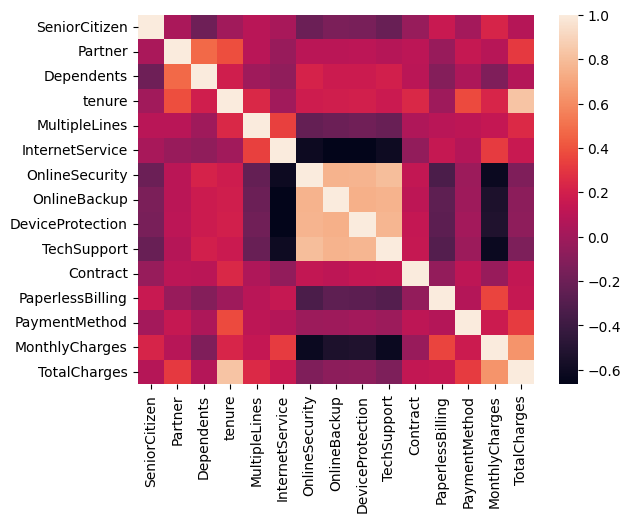

In [17]:
sns.heatmap(telco_num.corr())

In [18]:
telco_num.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [19]:
telco_num.shape

(2864, 15)

In [20]:
sc=StandardScaler()

telco_scaled=sc.fit_transform(telco_num)


In [21]:
type(telco_num)

pandas.core.frame.DataFrame

In [22]:
telco_scaled=pd.DataFrame(telco_scaled)

In [23]:
type(telco_scaled)

pandas.core.frame.DataFrame

APPLYING PCA

In [24]:
pc = PCA(0.95)

In [25]:
pc.fit(telco_scaled)

PCA(n_components=0.95)

In [26]:
x_pca=pc.transform(telco_scaled)

In [27]:
telco_scaled

0         1         2         3         4         5         6   \
0     2.277223 -0.931790 -0.633924 -1.222488 -0.928718  1.205087 -0.881503   
1    -0.439131 -0.931790 -0.633924 -1.058230 -0.928718 -0.161251 -0.881503   
2    -0.439131 -0.931790 -0.633924  0.132643  0.598175 -0.161251 -0.881503   
3    -0.439131 -0.931790 -0.633924 -0.811843  0.598175 -0.161251 -0.881503   
4    -0.439131  1.073203 -0.633924 -0.729714  0.598175  1.205087  0.368930   
...        ...       ...       ...       ...       ...       ...       ...   
2859 -0.439131 -0.931790 -0.633924 -0.236939  0.598175 -0.161251 -0.881503   
2860 -0.439131 -0.931790 -0.633924 -0.236939  0.598175 -0.161251 -0.881503   
2861 -0.439131 -0.931790 -0.633924 -0.236939  0.598175 -0.161251 -0.881503   
2862 -0.439131 -0.931790 -0.633924 -0.236939  0.598175 -0.161251 -0.881503   
2863 -0.439131 -0.931790 -0.633924 -0.236939  0.598175 -0.161251 -0.881503   

            7         8         9         10        11        12        13  \
0    -0.979027 -0.966031 -0.875102 -0.035216 -1.183499  0.568056 -0.646196   
1    -0.979027 -0.966031 -0.875102 -0.035216  0.844952 -0.377274  0.173624   
2     0.300140  0.308952 -0.875102 -0.035216  0.844952 -0.377274  1.402515   
3    -0.979027  0.308952 -0.875102 -0.035216  0.844952  0.568056  1.117506   
4     0.300140 -0.966031  0.373673 -0.035216  0.844952 -0.377274  0.391572   
...        ...       ...       ...       ...       ...       ...       ...   
2859  0.300140  0.308952 -0.875102 -0.035216  0.844952 -0.377274  0.192065   
2860  0.300140  0.308952 -0.875102 -0.035216  0.844952 -0.377274  0.192065   
2861  0.300140  0.308952 -0.875102 -0.035216  0.844952 -0.377274  0.192065   
2862  0.300140  0.308952 -0.875102 -0.035216  0.844952 -0.377274  0.192065   
2863  0.300140  0.308952 -0.875102 -0.035216  0.844952 -0.377274  0.192065   

            14  
0    -0.951647  
1    -0.828781  
2     0.633190  
3    -0.472148  
4    -0.528210  
...        ...  
2859 -0.388643  
2860 -0.388643  
2861 -0.388643  
2862 -0.388643  
2863 -0.388643  

[2864 rows x 15 columns]

In [28]:
x_pca.shape

(2864, 11)

In [29]:
pc.explained_variance_

array([4.71113062, 2.6798326 , 1.30425754, 1.0611615 , 0.9394626 ,
       0.89155764, 0.81287561, 0.78570005, 0.45181562, 0.44408865,
       0.26258987])

In [30]:
#Eigen values
sum(pc.explained_variance_)

14.344472296902438

In [31]:
#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

In [32]:
var

array([0.31396571, 0.17859313, 0.08692014, 0.0707194 , 0.06260897,
       0.05941642, 0.05417279, 0.05236171, 0.03011052, 0.02959557,
       0.01749988])

In [33]:
#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [34]:
var1

array([31.4 , 49.26, 57.95, 65.02, 71.28, 77.22, 82.64, 87.88, 90.89,
       93.85, 95.6 ])

In [35]:
#pc_final.components_

#print pd.DataFrame(pc_final.components_,columns=telco_num.columns).T

Loadings =  pd.DataFrame((pc.components_.T * np.sqrt(pc.explained_variance_)).T,columns=telco_num.columns).T

In [36]:
Loadings.to_csv("Loadings.csv")

In [37]:
list_var =['SeniorCitizen','Partner','Dependents','tenure','MultipleLines','InternetService','OnlineSecurity',
'OnlineBackup','DeviceProtection','TechSupport','Contract','PaperlessBilling','PaymentMethod',
'MonthlyCharges','TotalCharges']

In [38]:
telco_scaled = telco_scaled.apply(pd.to_numeric, errors='coerce')
telco_num = telco_num.apply(pd.to_numeric, errors='coerce')


In [39]:
telco_scaled.columns=telco_num.columns

In [40]:
telco_scaled

SeniorCitizen   Partner  Dependents    tenure  MultipleLines  \
0          2.277223 -0.931790   -0.633924 -1.222488      -0.928718   
1         -0.439131 -0.931790   -0.633924 -1.058230      -0.928718   
2         -0.439131 -0.931790   -0.633924  0.132643       0.598175   
3         -0.439131 -0.931790   -0.633924 -0.811843       0.598175   
4         -0.439131  1.073203   -0.633924 -0.729714       0.598175   
...             ...       ...         ...       ...            ...   
2859      -0.439131 -0.931790   -0.633924 -0.236939       0.598175   
2860      -0.439131 -0.931790   -0.633924 -0.236939       0.598175   
2861      -0.439131 -0.931790   -0.633924 -0.236939       0.598175   
2862      -0.439131 -0.931790   -0.633924 -0.236939       0.598175   
2863      -0.439131 -0.931790   -0.633924 -0.236939       0.598175   

      InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0            1.205087       -0.881503     -0.979027         -0.966031   
1           -0.161251       -0.881503     -0.979027         -0.966031   
2           -0.161251       -0.881503      0.300140          0.308952   
3           -0.161251       -0.881503     -0.979027          0.308952   
4            1.205087        0.368930      0.300140         -0.966031   
...               ...             ...           ...               ...   
2859        -0.161251       -0.881503      0.300140          0.308952   
2860        -0.161251       -0.881503      0.300140          0.308952   
2861        -0.161251       -0.881503      0.300140          0.308952   
2862        -0.161251       -0.881503      0.300140          0.308952   
2863        -0.161251       -0.881503      0.300140          0.308952   

      TechSupport  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0       -0.875102 -0.035216         -1.183499       0.568056       -0.646196   
1       -0.875102 -0.035216          0.844952      -0.377274        0.173624   
2       -0.875102 -0.035216          0.844952      -0.377274        1.402515   
3       -0.875102 -0.035216          0.844952       0.568056        1.117506   
4        0.373673 -0.035216          0.844952      -0.377274        0.391572   
...           ...       ...               ...            ...             ...   
2859    -0.875102 -0.035216          0.844952      -0.377274        0.192065   
2860    -0.875102 -0.035216          0.844952      -0.377274        0.192065   
2861    -0.875102 -0.035216          0.844952      -0.377274        0.192065   
2862    -0.875102 -0.035216          0.844952      -0.377274        0.192065   
2863    -0.875102 -0.035216          0.844952      -0.377274        0.192065   

      TotalCharges  
0        -0.951647  
1        -0.828781  
2         0.633190  
3        -0.472148  
4        -0.528210  
...            ...  
2859     -0.388643  
2860     -0.388643  
2861     -0.388643  
2862     -0.388643  
2863     -0.388643  

[2864 rows x 15 columns]

In [41]:
telco_scaled1=pd.DataFrame(telco_scaled,columns=list_var)

In [42]:
km_3=KMeans(n_clusters=3,random_state=123)

In [43]:
km_3.fit(telco_scaled1)
#km_4.labels_

KMeans(n_clusters=3, random_state=123)

In [44]:
km_3.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [45]:
telco_scaled1['Cluster'] = km_3.labels_

In [46]:
km_3.cluster_centers_

array([[ 0.0547513 ,  0.5170398 ,  0.21403667,  1.06970947,  0.42199525,
         0.35470907, -0.17904523, -0.13519449, -0.09821051, -0.18667449,
         0.19084335,  0.14988822,  0.51847601,  0.79533606,  1.29782079],
       [-0.34243262,  0.04475221,  0.31075132, -0.01679791, -0.57787818,
        -1.527589  ,  1.61936365,  1.57930686,  1.58393484,  1.62244806,
         0.18071238, -0.60581739, -0.19524427, -1.45636308, -0.6735522 ],
       [ 0.11862157, -0.33953676, -0.27066843, -0.65376774, -0.00356139,
         0.46088589, -0.61033568, -0.61960718, -0.64452962, -0.60699293,
        -0.19843216,  0.1770829 , -0.23356733,  0.15679686, -0.50235949]])

In [47]:
km_4=KMeans(n_clusters=4,random_state=123).fit(telco_scaled1)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(telco_scaled1)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(telco_scaled1)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(telco_scaled1)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(telco_scaled1)
#km_5.labels_

In [48]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
telco_num['cluster_3'] = km_3.labels_
telco_num['cluster_4'] = km_4.labels_
telco_num['cluster_5'] = km_5.labels_
telco_num['cluster_6'] = km_6.labels_
telco_num['cluster_7'] = km_7.labels_
telco_num['cluster_8'] = km_8.labels_

In [49]:
pd.Series(km_3.labels_).value_counts()/sum(pd.Series(km_3.labels_).value_counts())

2    0.484637
0    0.299581
1    0.215782
Name: count, dtype: float64

In [50]:
pd.Series(km_6.labels_).value_counts()/sum(pd.Series(km_6.labels_).value_counts())

1    0.385126
0    0.166550
3    0.127444
2    0.125698
4    0.105098
5    0.090084
Name: count, dtype: float64

### Choosing number clusters using Silhouette Coefficient

In [51]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(telco_scaled1, km_3.labels_)

0.2905788468847104

In [52]:
k_range = range(2, 11)
scores = []
wcss_values = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=123)
    km.fit(telco_scaled1)
    wcss = km.inertia_
    wcss_values.append(wcss)
    scores.append(metrics.silhouette_score(telco_scaled1, km.labels_))

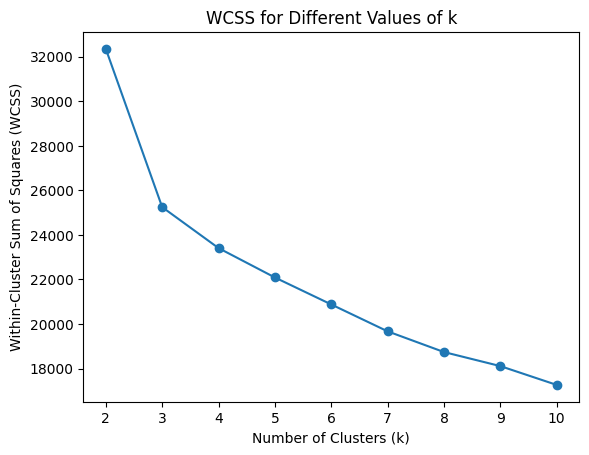

In [53]:
plt.plot(k_range, wcss_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('WCSS for Different Values of k')
plt.show()

In [54]:
scores

[0.3215357449756342,
 0.2905788468847104,
 0.24403261594144973,
 0.22627873037571752,
 0.1935995984594515,
 0.19354696666648658,
 0.18751938206190327,
 0.18340931312384778,
 0.19004788868654482]

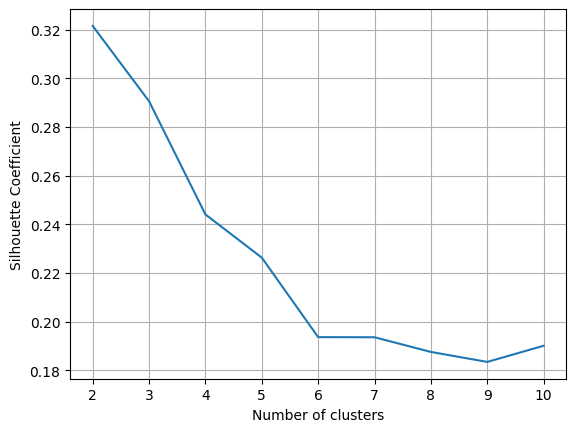

In [55]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [56]:
telco_num.cluster_3.value_counts()/1000

cluster_3
2    1.388
0    0.858
1    0.618
Name: count, dtype: float64

In [57]:
telco_num.cluster_3.value_counts()*100/sum(telco_num.cluster_3.value_counts())

cluster_3
2    48.463687
0    29.958101
1    21.578212
Name: count, dtype: float64

In [58]:
pd.Series.sort_index(telco_num.cluster_5.value_counts())

cluster_5
0     477
1    1103
2     618
3     365
4     301
Name: count, dtype: int64

In [59]:
telco_num.cluster_3.size

2864

In [60]:
size=pd.concat([pd.Series(telco_num.cluster_3.size), pd.Series.sort_index(telco_num.cluster_3.value_counts()), pd.Series.sort_index(telco_num.cluster_4.value_counts()),
           pd.Series.sort_index(telco_num.cluster_5.value_counts()), pd.Series.sort_index(telco_num.cluster_6.value_counts()),
           pd.Series.sort_index(telco_num.cluster_7.value_counts()), pd.Series.sort_index(telco_num.cluster_8.value_counts())])

In [61]:
size

0    2864
0     858
1     618
2    1388
0     813
1     618
2     330
3    1103
0     477
1    1103
2     618
3     365
4     301
0     477
1    1103
2     360
3     365
4     301
5     258
0     258
1     887
2     365
3     360
4     460
5     245
6     289
0     208
1     258
2     635
3     263
4     360
5     364
6     457
7     319
dtype: int64

In [62]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/telco_num.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

0    0    1     2    0    1    2     3    0     1  ...    5    6  \
Seg_size  2864  858  618  1388  813  618  330  1103  477  1103  ...  245  289   

            0    1    2    3    4    5    6    7  
Seg_size  208  258  635  263  360  364  457  319  

[1 rows x 34 columns]

In [63]:
pd.concat([Seg_size.T, Seg_Pct.T], axis=0)

0           0           1            2           0           1  \
Seg_size  2864.0  858.000000  618.000000  1388.000000  813.000000  618.000000   
Seg_Pct      1.0    0.299581    0.215782     0.484637    0.283869    0.215782   

                   2            3          0            1  ...           5  \
Seg_size  330.000000  1103.000000  477.00000  1103.000000  ...  245.000000   
Seg_Pct     0.115223     0.385126    0.16655     0.385126  ...    0.085545   

                   6           0           1           2          3  \
Seg_size  289.000000  208.000000  258.000000  635.000000  263.00000   
Seg_Pct     0.100908    0.072626    0.090084    0.221718    0.09183   

                   4           5           6           7  
Seg_size  360.000000  364.000000  457.000000  319.000000  
Seg_Pct     0.125698    0.127095    0.159567    0.111383  

[2 rows x 34 columns]

In [64]:
telco_num.head()

SeniorCitizen  Partner  Dependents  tenure  MultipleLines  InternetService  \
0            1.0      0.0         0.0     1.0            0.0              2.0   
1            0.0      0.0         0.0     5.0            0.0              1.0   
2            0.0      0.0         0.0    34.0            1.0              1.0   
3            0.0      0.0         0.0    11.0            1.0              1.0   
4            0.0      1.0         0.0    13.0            1.0              2.0   

   OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  ...  \
0             0.0           0.0               0.0          0.0  ...   
1             0.0           0.0               0.0          0.0  ...   
2             0.0           1.0               1.0          0.0  ...   
3             0.0           0.0               1.0          0.0  ...   
4             1.0           1.0               0.0          1.0  ...   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  cluster_3  \
0               0.0            2.0           45.25         45.25          2   
1               1.0            1.0           69.70        316.90          2   
2               1.0            1.0          106.35       3549.25          2   
3               1.0            2.0           97.85       1105.40          2   
4               1.0            1.0           76.20        981.45          2   

   cluster_4  cluster_5  cluster_6  cluster_7  cluster_8  
0          2          4          4          6          3  
1          3          1          1          1          2  
2          3          1          1          1          2  
3          3          1          1          1          2  
4          3          1          1          1          7  

[5 rows x 21 columns]

In [65]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([telco_num.apply(lambda x: x.mean()).T, telco_num.groupby('cluster_3').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_5').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_7').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)


In [66]:
Profling_output

0            0           1            2  \
SeniorCitizen        0.161662     0.181818    0.035599     0.205331   
Partner              0.464735     0.722611    0.487055     0.295389   
Dependents           0.286662     0.383450    0.427184     0.164265   
tenure              30.769902    56.819347   30.360841    14.849424   
MultipleLines        0.608240     0.884615    0.229773     0.605908   
InternetService      1.118017     1.377622    0.000000     1.455331   
OnlineSecurity       0.704958     0.561772    2.000000     0.216859   
OnlineBackup         0.765363     0.659674    2.000000     0.280980   
DeviceProtection     0.757682     0.680653    2.000000     0.252161   
TechSupport          0.700768     0.551282    2.000000     0.214697   
Contract             1.022696     1.145688    1.139159     0.894813   
PaperlessBilling     0.583450     0.657343    0.284790     0.670749   
PaymentMethod        1.399092     1.947552    1.192557     1.152017   
MonthlyCharges      64.521910    88.241725   21.087864    69.198163   
TotalCharges      2149.296945  5018.718648  660.104207  1038.603350   
cluster_3            1.185056     0.000000    1.000000     2.000000   
cluster_4            1.601606     0.104895    1.000000     2.794669   
cluster_5            1.619413     1.350816    2.000000     1.615994   
cluster_6            1.889665     1.350816    3.252427     1.615994   
cluster_7            2.617318     3.206294    1.747573     2.640490   
cluster_8            3.684358     5.402098    2.747573     3.039625   

                            0           1            2           3  \
SeniorCitizen        0.136531    0.035599     1.000000    0.000000   
Partner              0.726937    0.487055     0.387879    0.281958   
Dependents           0.396064    0.427184     0.060606    0.194923   
tenure              57.693727   30.360841    19.366667   14.565730   
MultipleLines        0.886839    0.229773     0.703030    0.586582   
InternetService      1.389914    0.000000     1.227273    1.511333   
OnlineSecurity       0.581796    2.000000     0.151515    0.235721   
OnlineBackup         0.666667    2.000000     0.336364    0.274705   
DeviceProtection     0.683887    2.000000     0.303030    0.252040   
TechSupport          0.569496    2.000000     0.124242    0.242067   
Contract             1.166052    1.139159     0.927273    0.880326   
PaperlessBilling     0.645756    0.284790     0.815152    0.635539   
PaymentMethod        1.964330    1.192557     1.221212    1.151405   
MonthlyCharges      88.119434   21.087864    78.126667   67.393971   
TotalCharges      5093.756089  660.104207  1554.721364  991.260471   
cluster_3            0.000000    1.000000     1.727273    2.000000   
cluster_4            0.000000    1.000000     2.000000    3.000000   
cluster_5            1.343173    2.000000     3.657576    1.000000   
cluster_6            1.343173    3.252427     3.657576    1.000000   
cluster_7            3.125461    1.747573     5.781818    1.783318   
cluster_8            5.432964    2.747573     2.936364    3.144152   

                            0           1  ...           5            6  \
SeniorCitizen        0.201258    0.000000  ...    0.048980     1.000000   
Partner              0.721174    0.281958  ...    0.416327     0.349481   
Dependents           0.354298    0.194923  ...    0.306122     0.034602   
tenure              52.465409   14.565730  ...   19.697959    17.117647   
MultipleLines        0.878407    0.586582  ...    1.742857     0.629758   
InternetService      1.238994    1.511333  ...    2.000000     1.204152   
OnlineSecurity       0.444444    0.235721  ...    0.326531     0.148789   
OnlineBackup         0.639413    0.274705  ...    0.310204     0.311419   
DeviceProtection     0.599581    0.252040  ...    0.281633     0.266436   
TechSupport          0.410901    0.242067  ...    0.342857     0.110727   
Contract             0.503145    0.880326  ...    0.808163     0.958478   
PaperlessBilling     0.7

In [67]:
Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)

In [68]:
Profling_output_final

0            0           1            2  \
Seg_size          2864.000000   858.000000  618.000000  1388.000000   
Seg_Pct              1.000000     0.299581    0.215782     0.484637   
SeniorCitizen        0.161662     0.181818    0.035599     0.205331   
Partner              0.464735     0.722611    0.487055     0.295389   
Dependents           0.286662     0.383450    0.427184     0.164265   
tenure              30.769902    56.819347   30.360841    14.849424   
MultipleLines        0.608240     0.884615    0.229773     0.605908   
InternetService      1.118017     1.377622    0.000000     1.455331   
OnlineSecurity       0.704958     0.561772    2.000000     0.216859   
OnlineBackup         0.765363     0.659674    2.000000     0.280980   
DeviceProtection     0.757682     0.680653    2.000000     0.252161   
TechSupport          0.700768     0.551282    2.000000     0.214697   
Contract             1.022696     1.145688    1.139159     0.894813   
PaperlessBilling     0.583450     0.657343    0.284790     0.670749   
PaymentMethod        1.399092     1.947552    1.192557     1.152017   
MonthlyCharges      64.521910    88.241725   21.087864    69.198163   
TotalCharges      2149.296945  5018.718648  660.104207  1038.603350   
cluster_3            1.185056     0.000000    1.000000     2.000000   
cluster_4            1.601606     0.104895    1.000000     2.794669   
cluster_5            1.619413     1.350816    2.000000     1.615994   
cluster_6            1.889665     1.350816    3.252427     1.615994   
cluster_7            2.617318     3.206294    1.747573     2.640490   
cluster_8            3.684358     5.402098    2.747573     3.039625   

                            0           1            2            3  \
Seg_size           813.000000  618.000000   330.000000  1103.000000   
Seg_Pct              0.283869    0.215782     0.115223     0.385126   
SeniorCitizen        0.136531    0.035599     1.000000     0.000000   
Partner              0.726937    0.487055     0.387879     0.281958   
Dependents           0.396064    0.427184     0.060606     0.194923   
tenure              57.693727   30.360841    19.366667    14.565730   
MultipleLines        0.886839    0.229773     0.703030     0.586582   
InternetService      1.389914    0.000000     1.227273     1.511333   
OnlineSecurity       0.581796    2.000000     0.151515     0.235721   
OnlineBackup         0.666667    2.000000     0.336364     0.274705   
DeviceProtection     0.683887    2.000000     0.303030     0.252040   
TechSupport          0.569496    2.000000     0.124242     0.242067   
Contract             1.166052    1.139159     0.927273     0.880326   
PaperlessBilling     0.645756    0.284790     0.815152     0.635539   
PaymentMethod        1.964330    1.192557     1.221212     1.151405   
MonthlyCharges      88.119434   21.087864    78.126667    67.393971   
TotalCharges      5093.756089  660.104207  1554.721364   991.260471   
cluster_3            0.000000    1.000000     1.727273     2.000000   
cluster_4            0.000000    1.000000     2.000000     3.000000   
cluster_5            1.343173    2.000000     3.657576     1.000000   
cluster_6            1.343173    3.252427     3.657576     1.000000   
cluster_7            3.125461    1.747573     5.781818     1.783318   
cluster_8            5.432964    2.747573     2.936364     3.144152   

                            0            1  ...           5            6  \
Seg_size           477.000000  1103.000000  ...  245.000000   289.000000   
Seg_Pct              0.166550     0.385126  ...    0.085545     0.100908   
SeniorCitizen        0.201258     0.000000  ...    0.048980     1.000000   
Partner              0.721174     0.281958  ...    0.416327     0.349481   
Dependents           0.354298     0.194923  ...    0.306122     0.034602   
tenure              52.465409    14.565730  ...   19.697959    17.117647   
MultipleLines        0.878407     0.586582  ...    1.742857     0.629758   
InternetSe

In [69]:
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [70]:
Profling_output_final

Overall        KM3_1       KM3_2        KM3_3  \
Seg_size          2864.000000   858.000000  618.000000  1388.000000   
Seg_Pct              1.000000     0.299581    0.215782     0.484637   
SeniorCitizen        0.161662     0.181818    0.035599     0.205331   
Partner              0.464735     0.722611    0.487055     0.295389   
Dependents           0.286662     0.383450    0.427184     0.164265   
tenure              30.769902    56.819347   30.360841    14.849424   
MultipleLines        0.608240     0.884615    0.229773     0.605908   
InternetService      1.118017     1.377622    0.000000     1.455331   
OnlineSecurity       0.704958     0.561772    2.000000     0.216859   
OnlineBackup         0.765363     0.659674    2.000000     0.280980   
DeviceProtection     0.757682     0.680653    2.000000     0.252161   
TechSupport          0.700768     0.551282    2.000000     0.214697   
Contract             1.022696     1.145688    1.139159     0.894813   
PaperlessBilling     0.583450     0.657343    0.284790     0.670749   
PaymentMethod        1.399092     1.947552    1.192557     1.152017   
MonthlyCharges      64.521910    88.241725   21.087864    69.198163   
TotalCharges      2149.296945  5018.718648  660.104207  1038.603350   
cluster_3            1.185056     0.000000    1.000000     2.000000   
cluster_4            1.601606     0.104895    1.000000     2.794669   
cluster_5            1.619413     1.350816    2.000000     1.615994   
cluster_6            1.889665     1.350816    3.252427     1.615994   
cluster_7            2.617318     3.206294    1.747573     2.640490   
cluster_8            3.684358     5.402098    2.747573     3.039625   

                        KM4_1       KM4_2        KM4_3        KM4_4  \
Seg_size           813.000000  618.000000   330.000000  1103.000000   
Seg_Pct              0.283869    0.215782     0.115223     0.385126   
SeniorCitizen        0.136531    0.035599     1.000000     0.000000   
Partner              0.726937    0.487055     0.387879     0.281958   
Dependents           0.396064    0.427184     0.060606     0.194923   
tenure              57.693727   30.360841    19.366667    14.565730   
MultipleLines        0.886839    0.229773     0.703030     0.586582   
InternetService      1.389914    0.000000     1.227273     1.511333   
OnlineSecurity       0.581796    2.000000     0.151515     0.235721   
OnlineBackup         0.666667    2.000000     0.336364     0.274705   
DeviceProtection     0.683887    2.000000     0.303030     0.252040   
TechSupport          0.569496    2.000000     0.124242     0.242067   
Contract             1.166052    1.139159     0.927273     0.880326   
PaperlessBilling     0.645756    0.284790     0.815152     0.635539   
PaymentMethod        1.964330    1.192557     1.221212     1.151405   
MonthlyCharges      88.119434   21.087864    78.126667    67.393971   
TotalCharges      5093.756089  660.104207  1554.721364   991.260471   
cluster_3            0.000000    1.000000     1.727273     2.000000   
cluster_4            0.000000    1.000000     2.000000     3.000000   
cluster_5            1.343173    2.000000     3.657576     1.000000   
cluster_6            1.343173    3.252427     3.657576     1.000000   
cluster_7            3.125461    1.747573     5.781818     1.783318   
cluster_8            5.432964    2.747573     2.936364     3.144152   

                        KM5_1        KM5_2  ...       KM7_6        KM7_7  \
Seg_size           477.000000  1103.000000  ...  245.000000   289.000000   
Seg_Pct              0.166550     0.385126  ...    0.085545     0.100908   
SeniorCitizen        0.201258     0.000000  ...    0.048980     1.000000   
Partner              0.721174     0.281958  ...    0.416327     0.349481   
Dependents           0.354298     0.194923  ...    0.306122     0.034602   
tenure              52.465409    14.565730  ...   19.697959    17.117647   
MultipleLines        0.878407     0.586582  ...    1.742857     0.629758   
Inte

In [71]:
Profling_output_final.to_csv('Profiling_output.csv')

new assignment

In [72]:
new_cust = pd.read_csv('../dataset/new_tel.csv')

In [73]:
new_cust.drop(new_cust.columns[[0,1]], axis=1, inplace=True)

In [74]:
new_cust

gender  SeniorCitizen Partner  Dependents  tenure PhoneService  \
0   Female              0     Yes           0       1           No   
1     Male              0      No           0       2          Yes   
2   Female              0      No           0       2          Yes   
3   Female              0      No           0       8          Yes   
4     Male              0      No           1      22          Yes   
5   Female              0      No           0      10           No   
6   Female              0     Yes           0      28          Yes   
7     Male              0      No           0      49          Yes   
8     Male              0      No           0      25          Yes   
9   Female              0      No           0      21          Yes   
10    Male              1      No           0       1           No   
11    Male              0     Yes           1      47          Yes   
12    Male              0     Yes           1       1           No   
13  Female              0      No           1      17          Yes   
14    Male              1     Yes           0       2          Yes   

       MultipleLines InternetService OnlineSecurity OnlineBackup  \
0   No phone service             DSL             No          Yes   
1                 No             DSL            Yes          Yes   
2                 No     Fiber optic             No           No   
3                Yes     Fiber optic             No           No   
4                Yes     Fiber optic             No          Yes   
5   No phone service             DSL            Yes           No   
6                Yes     Fiber optic             No           No   
7                Yes     Fiber optic             No          Yes   
8                 No     Fiber optic            Yes           No   
9                 No     Fiber optic             No          Yes   
10  No phone service             DSL             No           No   
11               Yes     Fiber optic             No          Yes   
12  No phone service             DSL             No          Yes   
13                No             DSL             No           No   
14                No     Fiber optic             No           No   

   DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                No          No          No              No  Month-to-month   
1                No          No          No              No  Month-to-month   
2                No          No          No              No  Month-to-month   
3               Yes          No         Yes             Yes  Month-to-month   
4                No          No         Yes              No  Month-to-month   
5                No          No          No              No  Month-to-month   
6               Yes         Yes         Yes             Yes  Month-to-month   
7               Yes          No         Yes             Yes  Month-to-month   
8               Yes         Yes         Yes             Yes  Month-to-month   
9               Yes          No          No             Yes  Month-to-month   
10              Yes          No          No             Yes  Month-to-month   
11               No          No         Yes             Yes  Month-to-month   
12               No          No          No              No  Month-to-month   
13               No          No         Yes             Yes  Month-to-month   
14              Yes          No         Yes             Yes  Month-to-month   

    PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  
0                  1           Electronic check           29.85         29.85  
1                  1               Mailed check           53.85        108.15  
2                  1           Electronic check           70.70        151.65  
3                  1           Electronic check           99.65        820.50  
4                  1    Credit card (automatic)           89.10       1949.40  
5                  0               Mailed check  

In [75]:
partner_map={'Yes': 1,'No':0}
multlines_map={'Yes': 1,'No':0,'No phone service':2}
interser_map={'Fiber optic': 1,'No':0,'DSL':2}
onlsec_map={'Yes': 1,'No':0,'No internet service':2}
onlback_map={'Yes': 1,'No':0,'No internet service':2}
devpro_map={'Yes': 1,'No':0,'No internet service':2}
techsup_map={'Yes': 1,'No':0,'No internet service':2}
contract_map={'Month-to-month': 1,'One year':0,'Two year':2}
paymethod_map={'Electronic check': 1,'Mailed check':0,'Bank transfer (automatic)':2,'Credit card (automatic)':3}


new_cust['Partner'] = new_cust['Partner'].map(partner_map)
new_cust['MultipleLines'] = new_cust['MultipleLines'].map(multlines_map)
new_cust['InternetService'] = new_cust['InternetService'].map(interser_map)
new_cust['OnlineSecurity'] = new_cust['OnlineSecurity'].map(onlsec_map)
new_cust['OnlineBackup'] = new_cust['OnlineBackup'].map(onlback_map)
new_cust['DeviceProtection'] = new_cust['DeviceProtection'].map(devpro_map)
new_cust['TechSupport'] = new_cust['TechSupport'].map(techsup_map)
new_cust['Contract'] = new_cust['Contract'].map(contract_map)
new_cust['PaymentMethod'] = new_cust['PaymentMethod'].map(paymethod_map)


In [76]:
new_cust1=new_cust[numeric_var_names]

In [77]:
new_cust1

SeniorCitizen  Partner  Dependents  tenure  MultipleLines  \
0               0        1           0       1              2   
1               0        0           0       2              0   
2               0        0           0       2              0   
3               0        0           0       8              1   
4               0        0           1      22              1   
5               0        0           0      10              2   
6               0        1           0      28              1   
7               0        0           0      49              1   
8               0        0           0      25              0   
9               0        0           0      21              0   
10              1        0           0       1              2   
11              0        1           1      47              1   
12              0        1           1       1              2   
13              0        0           1      17              0   
14              1        1           0       2              0   

    InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  \
0                 2               0             1                 0   
1                 2               1             1                 0   
2                 1               0             0                 0   
3                 1               0             0                 1   
4                 1               0             1                 0   
5                 2               1             0                 0   
6                 1               0             0                 1   
7                 1               0             1                 1   
8                 1               1             0                 1   
9                 1               0             1                 1   
10                2               0             0                 1   
11                1               0             1                 0   
12                2               0             1                 0   
13                2               0             0                 0   
14                1               0             0                 1   

    TechSupport  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges  \
0             0         1                 1              1           29.85   
1             0         1                 1              0           53.85   
2             0         1                 1              1           70.70   
3             0         1                 1              1           99.65   
4             0         1                 1              3           89.10   
5             0         1                 0              0           29.75   
6             1         1                 1              1          104.80   
7             0         1                 1              2          103.70   
8             1         1                 1              1          105.50   
9             0         1                 1              1           90.05   
10            0         1                 1              1           39.65   
11            0         1                 1              1           99.35   
12            0         1                 0              1           30.20   
13            0         1                 1              0           64.70   
14            0         1                 1              3           95.50   

    TotalCharges  
0          29.85  
1         108.15  
2         151.65  
3         820.50  
4        1949.40  
5         301.90  
6        3046.05  
7        5036.30  
8        2686.05  
9        1862.90  
10         39.65  
11       4749.15  
12         30.20  
13       1093.10  
14        181.65

In [78]:
new_cust_scaled=sc.transform(new_cust1)

In [79]:
new_cust_scaled

array([[-0.43913132,  1.07320342, -0.63392429, -1.22248847,  2.12506802,
         1.20508739, -0.88150316,  0.30013977, -0.96603109, -0.87510165,
        -0.03521601,  0.84495192, -0.37727385, -1.16256473, -0.95861208],
       [-0.43913132, -0.9317898 , -0.63392429, -1.1814239 , -0.92871763,
         1.20508739,  0.36893025,  0.30013977, -0.96603109, -0.87510165,
        -0.03521601,  0.84495192, -1.32260396, -0.35783394, -0.9231975 ],
       [-0.43913132, -0.9317898 , -0.63392429, -1.1814239 , -0.92871763,
        -0.16125081, -0.88150316, -0.97902733, -0.96603109, -0.87510165,
        -0.03521601,  0.84495192, -0.37727385,  0.20715414, -0.90352273],
       [-0.43913132, -0.9317898 , -0.63392429, -0.93503643,  0.59817519,
        -0.16125081, -0.88150316, -0.97902733,  0.30895188, -0.87510165,
        -0.03521601,  0.84495192, -0.37727385,  1.17786065, -0.60100622],
       [-0.43913132, -0.9317898 ,  1.57747543, -0.36013233,  0.59817519,
        -0.16125081, -0.88150316,  0.30013977, 

In [80]:
new_cust_scaled = new_cust_scaled.apply(pd.to_numeric, errors='coerce')
new_cust1 = new_cust1.apply(pd.to_numeric, errors='coerce')

AttributeError: 'numpy.ndarray' object has no attribute 'apply'

In [ ]:
def kmeans_assignment(centroids, points):
    num_centroids, dim = centroids.shape
    num_points, _ = points.shape

  # Tile and reshape both arrays into `[num_points, num_centroids, dim]`.
    centroids = np.tile(centroids, [num_points, 1]).reshape([num_points, num_centroids, dim])
    points = np.tile(points, [1, num_centroids]).reshape([num_points, num_centroids, dim])

  # Compute all distances (for all points and all centroids) at once and 
  # select the min centroid for each point.
    distances = np.sum(np.square(centroids - points), axis=2)
    return np.argmin(distances, axis=1)

In [ ]:
centroids = km_6.cluster_centers_

In [ ]:
points = new_cust_scaled

NameError: name 'new_cust_scaled' is not defined

In [ ]:
kmeans_assignment(centroids, points)

In [ ]:
new_cust['pred_segment'] = pd.Series(kmeans_assignment(centroids, points))

NameError: name 'points' is not defined

In [ ]:
new_cust.head()